# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [260]:
# Importando o pandas e Importando os datasets
import pandas as pd
treino=pd.read_csv('train.csv')
teste=pd.read_csv('test.csv')

In [261]:
# Visualizando essa base
treino.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<a id="index"></a>
## Explorando os dados
- Analisando as colunas com maior quantidade de valores nulos.

In [262]:
# Visualizando quantidade de valores vazios
(treino.isnull().sum()).sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

<a id='4top'></a>
- **As 4 primeiras colunas tem mais de 80% dos valores vazios na base de treino**
        - **PoolQC**: **Qualidade** da piscina
            - NA: No Pool
        - **MiscFeature**: Qualquer recurso não considerado nas outras categorias
            - NA: None
        - **Alley**: Tipo de beco / ruela para acesso a propriedade
            - NA: No alley access
        - **Fence**: **Qualidade** da cerca
            - NA: No Fence


- Nesses casos **o NA não é ausência de informação, <font color='red'>ele é uma informação</font>**


- Podemos entender melhor os dados nessas colunas e principalmente sua **relação com o preço de venda**

In [263]:
# Podemos substituir os valores vazios na primeira coluna por -1
treino[['PoolQC','MiscFeature','Alley','Fence']]=treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

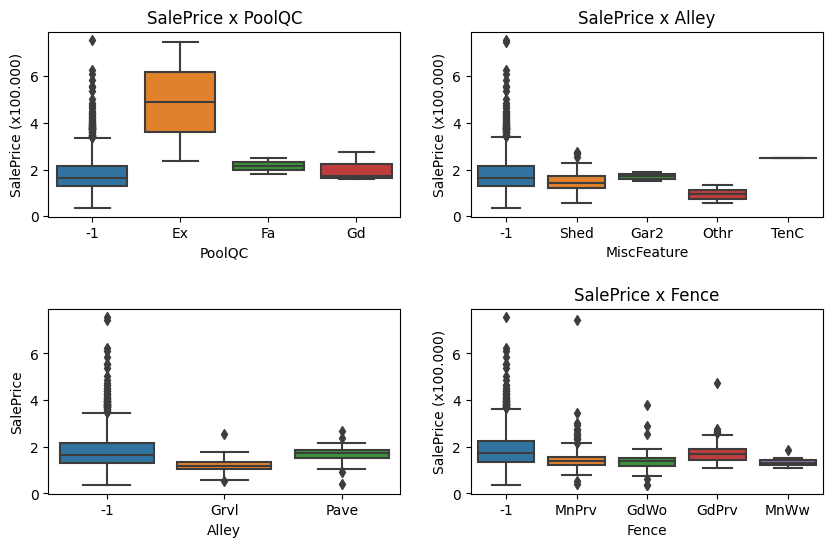

In [264]:
# Visualizando a relação com o preço
import matplotlib.pyplot as plt
import seaborn as sns
# plot
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
sns.boxplot(x=treino.PoolQC, y=treino.SalePrice/100000,
            ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice (x100.000)')
ax[0,0].set_title('SalePrice x PoolQC')

sns.boxplot(x=treino.MiscFeature, y=treino.SalePrice/100000,
            ax=ax[0,1])
ax[1,0].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('SalePrice x MiscFeature')
sns.boxplot(x=treino.Alley, y=treino.SalePrice/100000,
            ax=ax[1,0])
ax[0,1].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('SalePrice x Alley')
sns.boxplot(x=treino.Fence, y=treino.SalePrice/100000,
            ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice (x100.000)')
ax[1,1].set_title('SalePrice x Fence')

plt.subplots_adjust(hspace=0.5)
plt.show()

- **Vamos começar a já fazer os mesmos tratamentos para a <font color='blue'>base de teste</font>** 
    - (depois vamos automatizar esse processo, mas por enquanto vamos fazer o passo a passo de cada etapa)

In [265]:
# Ajustando também para a base de teste
teste[['PoolQC','MiscFeature','Alley','Fence']]=teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [266]:
# Verificando o shape da base de teste
teste.shape

(1459, 80)

<p style='text-align: right;'><a href="#index">Voltar</a></p>

<a id=FireplaceQu></a>
- **Agora analisando a coluna <font color='blue'>FireplaceQu</font>**
- Temos 2 colunas relacionadas a lareiras:
    - **Fireplaces**: Number of fireplaces
    - **FireplaceQu**: Fireplace quality

In [267]:
# Visualizando a quantidade de registros em cada rótulo
teste[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
dtype: int64

- Esse NaN também é uma informação, dizendo que **não existe lareira**

In [268]:
# Ajustando essa coluna
treino[['Fireplaces','FireplaceQu']]=treino[['Fireplaces','FireplaceQu']].fillna(-1)
teste[['Fireplaces','FireplaceQu']]=teste[['Fireplaces','FireplaceQu']].fillna(-1)

- Novamente fazendo o mesmo para a **<font color='blue'>base de teste</font>**

- **Visualizando novamente as informações de valores vazios**

In [269]:
# Calculando % a quantidade de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtFinType1    0.025342
dtype: float64

<a id=LotFrontage></a>
- **<font color='blue'>LotFrontage</font>: Pés lineares (medida de distância) de rua conectados à propriedade**

In [270]:
# Entendendo os tipos de propriedades que possuem valor nulo
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts(dropna=False)

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [271]:
# Verificando a média por tipo de propriedade
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

- Nesse caso o valor vazio **parece um erro da base**, em minha análise acredito que substituir pela média faça sentido.

In [272]:
# Substituindo os valores vazios pela média em relação ao LotConfig
treino['LotFrontage']=treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))
teste['LotFrontage']=teste['LotFrontage'].fillna(teste.groupby('LotConfig')['LotFrontage'].transform('mean'))

<a id="garagem"></a>
- **Avaliando as <font color='blue'>colunas de garagem</font>**
    - **GarageType**: Garage location
        - **NA: No Garage**
    - **GarageYrBlt**: Year garage was built
	- **GarageFinish**: Interior finish of the garage
        - **NA: No Garage**		
    - **GarageCars**: Size of garage in car capacity
	- **GarageArea**: Size of garage in square feet
	- **GarageQual**: Garage quality
        - **NA: No Garage**		
	- **GarageCond**: Garage condition
        - **NA: No Garage**		

In [273]:
# Verificando as colunas que possuem garagem no nome
col_garagem=treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [274]:
# Filtrando a base
treino.loc[treino.GarageType.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

- **O NaN em todas essas colunas é que não existe garagem**

In [275]:
# Podemos selecionar apenas as colunas vazias (não numericas)
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [276]:
# Verificando os valores
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           81
dtype: int64

In [277]:
# E substituir esses valores por -1
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

In [278]:
# Verificando novamente quando a quantidade de carros é igual a 0
treino.loc[treino.GarageCars == 0,col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
dtype: int64

In [279]:
# Resumindo os valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(9)

BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu      0
dtype: int64

- Para a **<font color='blue'>base de teste</font>**

In [280]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
dtype: int64

- Para a base de testes, além de valores vazios, temos 2 valores com 'Detchd'.
- Começando a tratar as linhas onde GarageCars é zero e tudo é vazio

In [281]:
# Analisando a condição de GarageQual e GarageCond serem nulos
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
53,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1453,NaN,NaN,NaN,NaN,NaN
1454,NaN,NaN,NaN,NaN,NaN


In [282]:
# E substituir esses valores por -1
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] =-1

- Agora vamos entender as colunas com tudo vazio mas GarageType = "Detchd"

In [283]:
# Entendendo essas colunas
teste.loc[teste.GarageCond.isnull(),col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


- Analisando a coluna GarageYrBlt

In [284]:
# Vamos verificar os valores quando GarageType == "Detchd"
teste2=teste.loc[(teste.GarageType=='Detchd')& (teste.YearBuilt!=-1)]
teste2.corr()['GarageYrBlt'].sort_values(ascending=False).head(3)

GarageYrBlt    1.000000
YearBuilt      0.615951
GarageArea     0.494670
Name: GarageYrBlt, dtype: float64

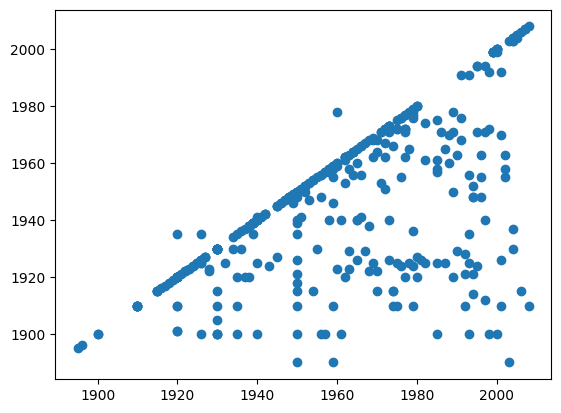

In [285]:
# Visualizando essa correlação
# plot
fig, ax = plt.subplots()
ax.scatter(teste2.GarageYrBlt,teste2.YearBuilt)
plt.show()

- É possível vermos que existe relação linear entre a construção da casa e a construção da garagem, como o esperado.

In [286]:
# Verificando os valores de construção da casa
teste.loc[teste.GarageCond.isnull(),'YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [287]:
# Substituindo as colunas vazias pelo ano de construção da casa
teste.loc[teste.GarageCond.isnull(),'GarageYrBlt'] = teste.loc[teste.GarageCond.isnull(),'YearBuilt']

- E a coluna GarageFinish

In [288]:
# Vamos verificar os valores quando GarageType == "Detchd"
moda_garage_finish = teste.loc[(teste.GarageType=='Detchd'),'GarageFinish'].mode()[0]
moda_garage_finish

'Unf'

In [289]:
# Podemos substituir pelo valor mais frequente
teste.loc[(teste.GarageType=='Detchd')&(teste.GarageFinish.isnull()),'GarageFinish'] = moda_garage_finish

- Fazendo o mesmo para GarageQual e GarageCond

In [290]:
# Vamos verificar os valores quando GarageType == "Detchd"
teste.loc[(teste.GarageType=='Detchd'),['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            309
Fa          TA             38
            Fa             19
TA          Fa             16
Fa          Po              3
Gd          Ex              1
Po          Fa              1
            Po              1
TA          Gd              1
            Po              1
dtype: int64

In [291]:
# Podemos verificar a moda dessa coluna
moda_GarageQual = teste.loc[(teste.GarageType == 'Detchd'),'GarageQual'].mode()[0]
moda_GarageCond = teste.loc[(teste.GarageType == 'Detchd'),'GarageCond'].mode()[0]

In [292]:
# Podemos substituir pelo valor mais frequente
teste.loc[(teste.GarageType=='Detchd')&(teste.GarageQual.isnull()),'GarageQual'] = moda_GarageQual
teste.loc[(teste.GarageType=='Detchd')&(teste.GarageCond.isnull()),'GarageCond'] = moda_GarageCond

- Para finalizar as colunas de garagem, vamos tratar GarageCars e GarageArea

In [293]:
# Agora vamos visualizar a média desses valores quando GarageType == "Detchd"
media_carros=teste.loc[(teste.GarageType=='Detchd'),['GarageCars','GarageArea']].mean()
media_carros

GarageCars      1.519182
GarageArea    412.202046
dtype: float64

In [294]:
# Como Não é possível ter meio carro, vamos arredondar os valores.
media_carros=round(media_carros,0)
media_carros.values

array([  2., 412.])

In [295]:
# Podemos usar esses valores se a média for vazia
teste.loc[(teste.GarageType=='Detchd'),['GarageCars','GarageArea']] =media_carros.values

In [296]:
#Visualizando os tratamentos feitos
teste.iloc[[666,1116],55:66]

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
666,Typ,0,-1,Detchd,1910.0,Unf,2.0,412.0,TA,TA,Y
1116,Typ,0,-1,Detchd,1923.0,Unf,2.0,412.0,TA,TA,Y


In [297]:
# Resumindo os valores vazios da base de teste
teste.isnull().sum().sort_values().tail(10)

BsmtHalfBath     2
BsmtFullBath     2
MSZoning         4
MasVnrArea      15
MasVnrType      16
BsmtFinType2    42
BsmtFinType1    42
BsmtExposure    44
BsmtQual        44
BsmtCond        45
dtype: int64

<p style='text-align: right;'><a href="#index">Voltar</a></p>

<a id="porao"></a>
- **E fazendo a mesma coisa para as <font color='blue'>colunas de Porão</font>**
    - **NA: No Basement**

In [298]:
# Verificando as colunas que possuem porão no nome e possuem valores vazios
col_porao=treino.columns[treino.columns.str.contains('Bsmt') & treino.isnull().any()]
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [299]:
# Analisando os valores
treino.loc[treino.BsmtFinType2.isnull(),col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Gd        TA        No            GLQ           NaN              1
dtype: int64

In [300]:
treino.loc[treino.BsmtFinType2.isnull(),['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

BsmtFinType2  BsmtFinSF2
NaN           0             37
              479            1
dtype: int64

- Primeiro tratando o valor BsmtFinType2

In [301]:
# Verificando os dados na mesma condição e substituindo esse valor da moda
moda_BsmtFinType2 = treino.BsmtFinType2.mode()[0]
print(moda_BsmtFinType2)
treino.loc[(treino.BsmtFinType2.isnull()) & (treino.BsmtFinSF2 != 0),['BsmtFinType2','BsmtFinSF2']] = moda_BsmtFinType2

Unf


- Agora considerando as colunas que BsmtQual e BsmtCond são vazias

In [302]:
# Verificando os valores com BsmtQual vazio
treino.loc[treino.BsmtQual.isnull(),col_porao].value_counts(dropna=False)
treino.loc[treino.BsmtQual.isnull(),col_porao] = -1

In [303]:
# Visualizando as colunas que ainda estão com valores vazios
treino.isnull().sum().sort_values(ascending=False).head(5)

MasVnrType      8
MasVnrArea      8
BsmtExposure    1
Electrical      1
KitchenAbvGr    0
dtype: int64

- E agora analisando o BsmtExposure

In [304]:
# Analisando os valores
treino.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
-1     37
Name: BsmtExposure, dtype: int64

In [305]:
# E novamente podemos ver o valor mais frequente
moda_BsmtExposure = treino.BsmtExposure.mode()[0]
treino.loc[treino.BsmtExposure.isnull(),'BsmtExposure'] = moda_BsmtExposure

- O mesmo para **<font color='blue'>teste</font>**

- Começando a tratar a coluna BsmtQual

In [306]:
# Analisando essas linhas
col_porao_teste = teste.columns[teste.columns.str.contains("Bsmt") & (teste.isnull().any())]
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
          Fa        No            Unf           0.0         Unf           0.0         173.0      173.0        0.0           0.0              1
          TA        No            Unf           0.0         Unf           0.0         356.0      356.0        0.0           0.0              1
          NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
dtype: int64

In [307]:
# Podemos atribuir o valor da moda igual fizemos nas colunas acima
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),'BsmtQual'] = teste.BsmtQual.mode()[0]

In [308]:
# Visualizando essas linhas
teste.iloc[757:759,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,TA,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,TA,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


- Agora tratando as outras colunas

In [309]:
# Visualizando
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
                                                                                                              NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
dtype: int64

In [310]:
# Substituindo por -1 se as duas condições forem verdadeiras
teste.loc[teste.BsmtQual.isnull(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']] = 0
teste.loc[teste.BsmtQual.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = -1

In [311]:
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

Series([], dtype: int64)

In [312]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtCond         3
Utilities        2
BsmtExposure     2
Functional       2
KitchenQual      1
Exterior2nd      1
Exterior1st      1
dtype: int64

- Analisando o restante das colunas de porão

In [313]:
# Selecionando TODAS as colunas de porão
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtCond         3
Utilities        2
BsmtExposure     2
Functional       2
KitchenQual      1
Exterior2nd      1
Exterior1st      1
dtype: int64

- E começando por BsmtCond

In [314]:
# E visualizando BsmtCond na base
teste.loc[teste.BsmtCond.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        NaN       Mn            GLQ           1044.0      Rec           382.0       0.0        1426.0       1.0           0.0             1
TA        NaN       Av            ALQ           755.0       Unf           0.0         240.0      995.0        0.0           0.0             1
                    No            BLQ           1033.0      Unf           0.0         94.0       1127.0       0.0           1.0             1
dtype: int64

In [315]:
# Podemos usar a moda para substituir o valor
teste.loc[teste.BsmtCond.isnull(),'BsmtCond'] = teste.BsmtCond.mode()[0]

- Verificando BsmtHalfBath e BsmtFullBath

In [316]:
# Visualizando os valores
teste.loc[teste.BsmtExposure.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        TA        NaN           Unf           0.0         Unf           0.0         725.0      725.0        0.0           0.0             1
                                                                                      1595.0     1595.0       0.0           0.0             1
dtype: int64

In [317]:
teste.loc[teste.BsmtCond.isnull(),'BsmtCond'] = teste.BsmtCond.mode()[0]

In [318]:
teste.loc[teste.BsmtExposure.isnull(),'BsmtExposure']=teste.BsmtExposure.mode()[0]

- **Voltando para os valores nulos**

In [319]:
# Verificando a quantidade de valores na base de treino
treino.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      8
MasVnrArea      8
Electrical      1
KitchenQual     0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

<a id="restante"></a>
- Ainda Faltam 3 colunas:
    - **<font color='blue'>MasVnrType</font>**: Tipo de cobertura de alvenaria
        - **None: None**
    - **<font color='blue'>MasVnrArea</font>**: Área de cobertura de alvenaria em pés quadrados
        - **None: None**
    - **<font color='blue'>Electrical system</font>**: Sistema elétrico

In [320]:
# Verificando os valores vazios nas duas primeiras colunas
treino.loc[treino.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [321]:
# Utilizando a moda para o valor dessa coluna
treino.loc[treino.MasVnrType.isnull(),'MasVnrType']=treino.MasVnrType.mode()[0]

In [322]:
# Verificando os valores onde MasVnrType são "None"
treino.loc[treino.MasVnrType=='None','MasVnrArea'].value_counts()

0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

In [323]:
# E como, para MasVnrType igual a None temos que MasVnrArea é zero
treino.loc[treino.MasVnrArea.isnull(),'MasVnrArea']=treino.MasVnrArea.mode()[0]

- **Avaliando a coluna de sistema elétrico**

In [324]:
# Visualizando os valores em sistema elétrico
treino.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [325]:
# Considerando esse valor como SBrkr
treino.loc[treino.Electrical.isnull(),'Electrical']=treino.Electrical.mode()[0]

In [326]:
# Verificando valores vazios
treino.isnull().sum().sort_values(ascending=False).head(3)

Id             0
CentralAir     0
GarageYrBlt    0
dtype: int64

- Por fim, conseguimos tratar toda base de treino

- Para a **<font color='blue'>base de teste</font>**

In [327]:
# Verificando os valores vazios nas duas primeiras colunas
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      16
MasVnrArea      15
MSZoning         4
Utilities        2
Functional       2
Exterior2nd      1
SaleType         1
Exterior1st      1
KitchenQual      1
TotRmsAbvGrd     0
dtype: int64

- Na base de teste temos outras colunas para tratar.
- Vamos primeiro tratar o valor que possui MasVnrArea mas MasVnrType é vazio, utilizando os mesmos tratamentos.

In [328]:
# Verificando os valores mais frequentes de MasVnrType
teste.loc[teste.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


- Na linha 1150 'MasVnrArea' possui área, mas não 'MasVnrType' o que pode indicar um erro na importação da base

In [329]:
#teste.loc[teste.MasVnrType>0,'MasVnrType']
teste.loc[(teste.MasVnrType.isnull())& (teste.MasVnrArea >0),'MasVnrType'] =teste[teste.MasVnrArea>0].MasVnrType.mode()[0]

- Agora para todos os outros valores, vamos fazer o mesmo que fizemos para a base de treino

In [330]:
# Visualizando a moda
print(treino.MasVnrType.mode()[0])
print(treino.MasVnrArea.mode()[0])

None
0.0


In [331]:
# E como, para MasVnrType igual a None temos que MasVnrArea é zero
teste.loc[teste.MasVnrType.isnull(),['MasVnrType']]=treino.MasVnrType.mode()[0]
teste.loc[teste.MasVnrArea.isnull(),['MasVnrArea']]=treino.MasVnrArea.mode()[0]

In [332]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(8)

MSZoning        4
Functional      2
Utilities       2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageYrBlt     0
dtype: int64

<p style='text-align: right;'><a href="#index">Voltar</a></p>

<a id='restante_teste'></a>
- **Analisando o restante da base de teste**
- **Entendendo essas colunas**
    - **<font color='blue'>MSZoning</font>**: Região onde fica a casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **<font color='blue'>Functional</font>**: Funcionalidades da casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **<font color='blue'>Utilities</font>**: Utilidades disponíveis
        - NA: A informação não foi adicionada na base (ausência de informação)
    - ...

In [333]:
# Verificando os valores em MSZoning
print(teste.MSZoning.value_counts())
teste.loc[teste.MSZoning.isnull(),'MSZoning']=teste.MSZoning.mode()[0]

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [334]:
# Verificando os valores em Utilities
print(teste.Utilities.value_counts())
teste.loc[teste.Utilities.isnull(),'Utilities']=teste.Utilities.mode()[0]

AllPub    1457
Name: Utilities, dtype: int64


In [335]:
# Verificando os valores em Functional
print(teste.Functional.value_counts())
teste.loc[teste.Functional.isnull(),'Functional']=teste.Functional.mode()[0]

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [336]:
# Visualizando as ultimas colunas
teste.isnull().sum().sort_values(ascending=False).head(5)

SaleType       1
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Id             0
dtype: int64

In [338]:
# E substituindo esses valores
print(teste.SaleType.mode()[0])
teste.loc[teste.SaleType.isnull(),'SaleType']=teste.SaleType.mode()[0]
print(teste.Exterior1st.mode()[0])
teste.loc[teste.Exterior1st.isnull(),'Exterior1st']=teste.Exterior1st.mode()[0]
print(teste.Exterior2nd.mode()[0])
teste.loc[teste.Exterior2nd.isnull(),'Exterior2nd']=teste.Exterior2nd.mode()[0]
print(teste.KitchenQual.mode()[0])
teste.loc[teste.KitchenQual.isnull(),'KitchenQual']=teste.KitchenQual.mode()[0]

WD
VinylSd
VinylSd
TA


In [339]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(3)

Id            0
MSSubClass    0
GarageType    0
dtype: int64

- **Para finalizar, vamos exportar essas duas bases**

In [340]:
# Exportando a base de treino e teste
treino.to_csv('train_cleaning.csv',index=False)
teste.to_csv('teste_cleaning.csv',index=False)